In [ ]:
pip install scikit-optimize category_encoders

Barrier


In [ ]:
import pandas as pd # pandas for data manipulation and dataframes
import os # os to work with local machines operating system
import kagglehub # kagglehub lets us download the dataset from the kaggle website

path = kagglehub.dataset_download("pilarpieiro/tabular-dataset-ready-for-malicious-url-detection")
print("Path to dataset files:", path)
csv_path = os.path.join(path, "test_dataset.csv")
df = pd.read_csv(csv_path)
print(list(df.columns))

Using Colab cache for faster access to the 'tabular-dataset-ready-for-malicious-url-detection' dataset.
Path to dataset files: /kaggle/input/tabular-dataset-ready-for-malicious-url-detection
['url', 'label', 'source', 'url_has_login', 'url_has_client', 'url_has_server', 'url_has_admin', 'url_has_ip', 'url_isshorted', 'url_len', 'url_entropy', 'url_hamming_1', 'url_hamming_00', 'url_hamming_10', 'url_hamming_01', 'url_hamming_11', 'url_2bentropy', 'url_3bentropy', 'url_count_dot', 'url_count_https', 'url_count_http', 'url_count_perc', 'url_count_hyphen', 'url_count_www', 'url_count_atrate', 'url_count_hash', 'url_count_semicolon', 'url_count_underscore', 'url_count_ques', 'url_count_equal', 'url_count_amp', 'url_count_letter', 'url_count_digit', 'url_count_sensitive_financial_words', 'url_count_sensitive_words', 'url_nunique_chars_ratio', 'path_len', 'path_count_no_of_dir', 'path_count_no_of_embed', 'path_count_zero', 'path_count_pertwent', 'path_has_any_sensitive_words', 'path_count_lo

In [ ]:
df['source'].value_counts() # displ

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state =3)

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=3))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
   'clf__max_depth' : Integer(2,8),
   'clf__learning_rate' : Real(0.001, 1.0, prior='log-uniform'),
   'clf__subsample' : Real(0.5,1.0),
   'clf__colsample_bytree' : Real(0.5,1.0),
   'clf__colsample_bylevel' : Real(0.5,1.0),
   'clf__colsample_bynode' : Real(0.5,1.0),
   'clf__reg_alpha' : Real(0.0,10.0),
   'clf__reg_lambda' : Real(0.0,10.0),
   'clf__gamma' : Real(0.0,10.0),
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=3)

In [ ]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=N...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [ ]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=['url', 'source', 'tld'])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9275769459765062,
                               colsample_bynode=0.615873616651108,
                               colsample_bytree=0.9017296699760271, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, featur...
                               gamma=0.08342580673110335, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.0031856662013201725,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
opt.best_score_

np.float64(0.9986931238462095)

In [ ]:
opt.score(X_test, y_test)

np.float64(0.998836077331167)

In [ ]:
opt.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
opt.predict_proba(X_test)

array([[0.84377205, 0.15622796],
       [0.7571795 , 0.2428205 ],
       [0.7598251 , 0.24017487],
       ...,
       [0.84377205, 0.15622796],
       [0.7596936 , 0.24030639],
       [0.8437693 , 0.1562307 ]], dtype=float32)

In [ ]:
opt.best_estimator_.steps

[('encoder', TargetEncoder(cols=['url', 'source', 'tld'])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.9275769459765062,
                colsample_bynode=0.615873616651108,
                colsample_bytree=0.9017296699760271, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=0.08342580673110335, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.0031856662013201725,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

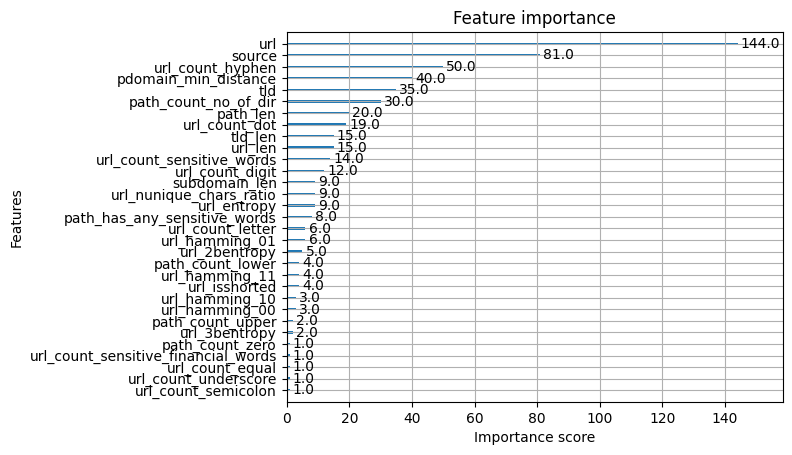

In [ ]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[1]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)